#### Imported the necessary libraries, read the dataset, and analyzed the data while clearing null values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
df = pd.read_csv("Datasets/AQI.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3089 non-null   int64  
 1   country        3089 non-null   object 
 2   state          3089 non-null   object 
 3   city           3089 non-null   object 
 4   station        3089 non-null   object 
 5   pollutant_id   3089 non-null   object 
 6   pollutant_min  2852 non-null   float64
 7   pollutant_max  2852 non-null   float64
 8   pollutant_avg  2852 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 217.3+ KB


In [4]:
df = df.dropna()

In [5]:
df.shape

(2852, 9)

#### Creating a smaller dataset for the Delhi state and plotting the data for the number and types of pollutants recorded at each station.

In [6]:
delhi = df[df['state'] == 'Delhi']

In [7]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 2821
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             239 non-null    int64  
 1   country        239 non-null    object 
 2   state          239 non-null    object 
 3   city           239 non-null    object 
 4   station        239 non-null    object 
 5   pollutant_id   239 non-null    object 
 6   pollutant_min  239 non-null    float64
 7   pollutant_max  239 non-null    float64
 8   pollutant_avg  239 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 18.7+ KB


In [8]:
delhi = delhi.copy()
delhi.drop(['pollutant_min','pollutant_max'],axis=1,inplace=True)
delhi['station'] = delhi['station'].str.split(', ').str[0]

In [9]:
display(delhi)

,id,country,state,city,station,pollutant_id,pollutant_avg
0,687,India,Delhi,Delhi,Sonia Vihar,OZONE,8.0
1,688,India,Delhi,Delhi,Sri Aurobindo Marg,PM2.5,79.0
2,690,India,Delhi,Delhi,Sri Aurobindo Marg,NO2,14.0
3,696,India,Delhi,Delhi,Vivek Vihar,PM10,144.0
273,473,India,Delhi,Delhi,Anand Vihar,PM10,335.0
...,...,...,...,...,...,...,...
2817,663,India,Delhi,Delhi,Rohini,NH3,10.0
2818,667,India,Delhi,Delhi,Shadipur,PM2.5,96.0
2819,668,India,Delhi,Delhi,Shadipur,PM10,167.0
2820,671,India,Delhi,Delhi,Shadipur,SO2,13.0


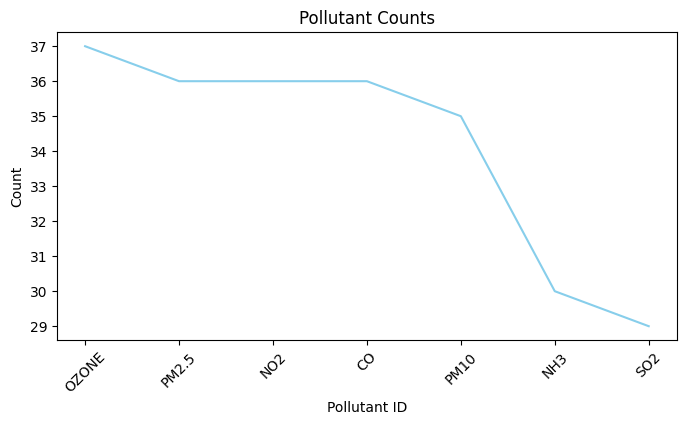

In [10]:
pollutant_counts = delhi['pollutant_id'].value_counts()

plt.figure(figsize=(8, 4))
plt.plot(pollutant_counts.index, pollutant_counts.values, color='skyblue')
plt.xlabel('Pollutant ID')
plt.ylabel('Count')
plt.title('Pollutant Counts')
plt.xticks(rotation=45)
plt.show()

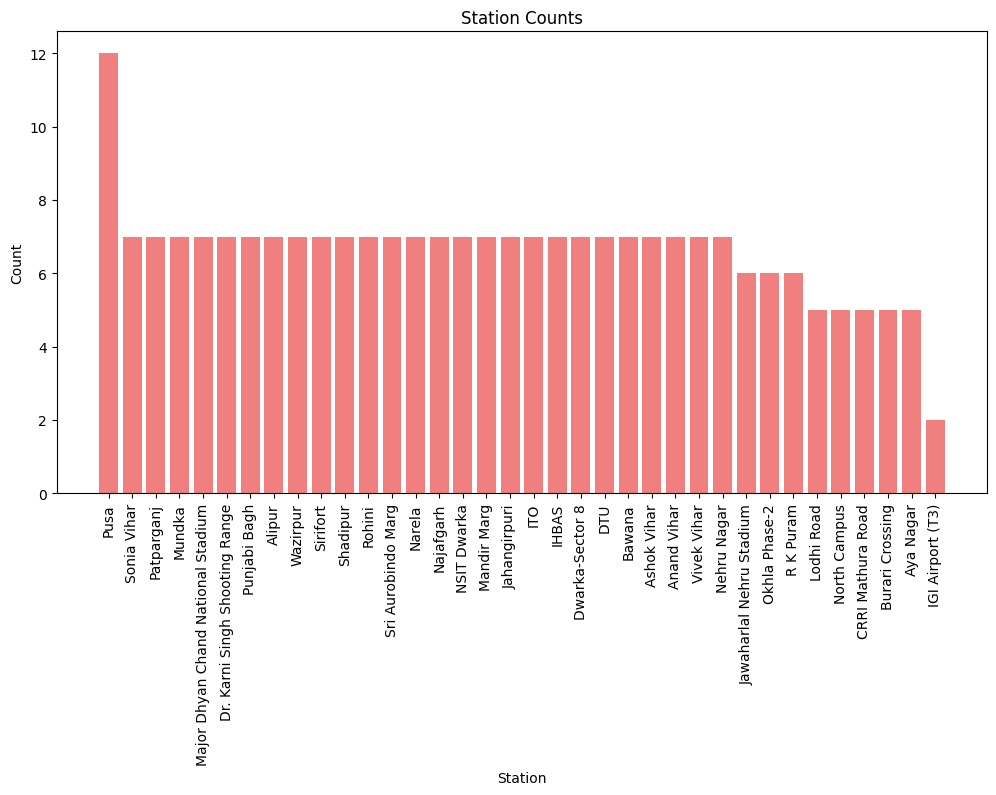

In [11]:
station_counts = delhi['station'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(station_counts.index, station_counts.values, color='lightcoral')
plt.xlabel('Station')
plt.ylabel('Count')
plt.title('Station Counts')
plt.xticks(rotation=90)
plt.show()

#### Separating the dataset for each type of pollutant
#### Plotting a relational graph between ```OZONE``` and ```PM2.5``` at each station

In [12]:
ozone = delhi[delhi['pollutant_id'] == 'OZONE']
pm_25 = delhi[delhi['pollutant_id'] == 'PM2.5']
no_2 = delhi[delhi['pollutant_id'] == 'NO2']
pm_10 = delhi[delhi['pollutant_id'] == 'PM10']
co = delhi[delhi['pollutant_id'] == 'CO']
nh_10 = delhi[delhi['pollutant_id'] == 'NH3']
so_2 = delhi[delhi['pollutant_id'] == 'SO2']

In [13]:
display(ozone.head())

,id,country,state,city,station,pollutant_id,pollutant_avg
0,687,India,Delhi,Delhi,Sonia Vihar,OZONE,8.0
281,514,India,Delhi,Delhi,DTU,OZONE,38.0
286,528,India,Delhi,Delhi,Dwarka-Sector 8,OZONE,4.0
323,554,India,Delhi,Delhi,Jahangirpuri,OZONE,20.0
332,607,India,Delhi,Delhi,Narela,OZONE,27.0


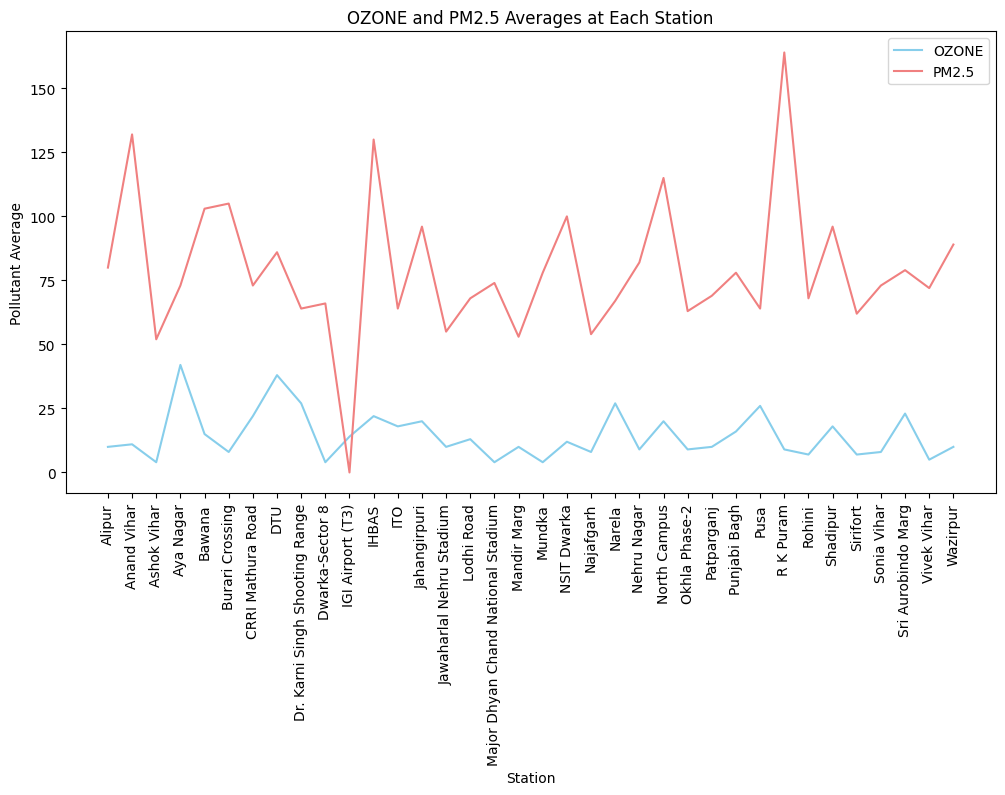

In [14]:
common_stations = sorted(set(ozone['station']) | set(pm_25['station']))

ozone_avg_values = [ozone[ozone['station'] == station]['pollutant_avg'].values[0] if station in ozone['station'].values else 0 for station in common_stations]
pm25_avg_values = [pm_25[pm_25['station'] == station]['pollutant_avg'].values[0] if station in pm_25['station'].values else 0 for station in common_stations]

plt.figure(figsize=(12, 6))
plt.plot(common_stations, ozone_avg_values, color='skyblue', label='OZONE')
plt.plot(common_stations, pm25_avg_values, color='lightcoral', label='PM2.5')
plt.xlabel('Station')
plt.ylabel('Pollutant Average')
plt.title('OZONE and PM2.5 Averages at Each Station')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Plotting a graph for the recorded average pollutant levels at each station.

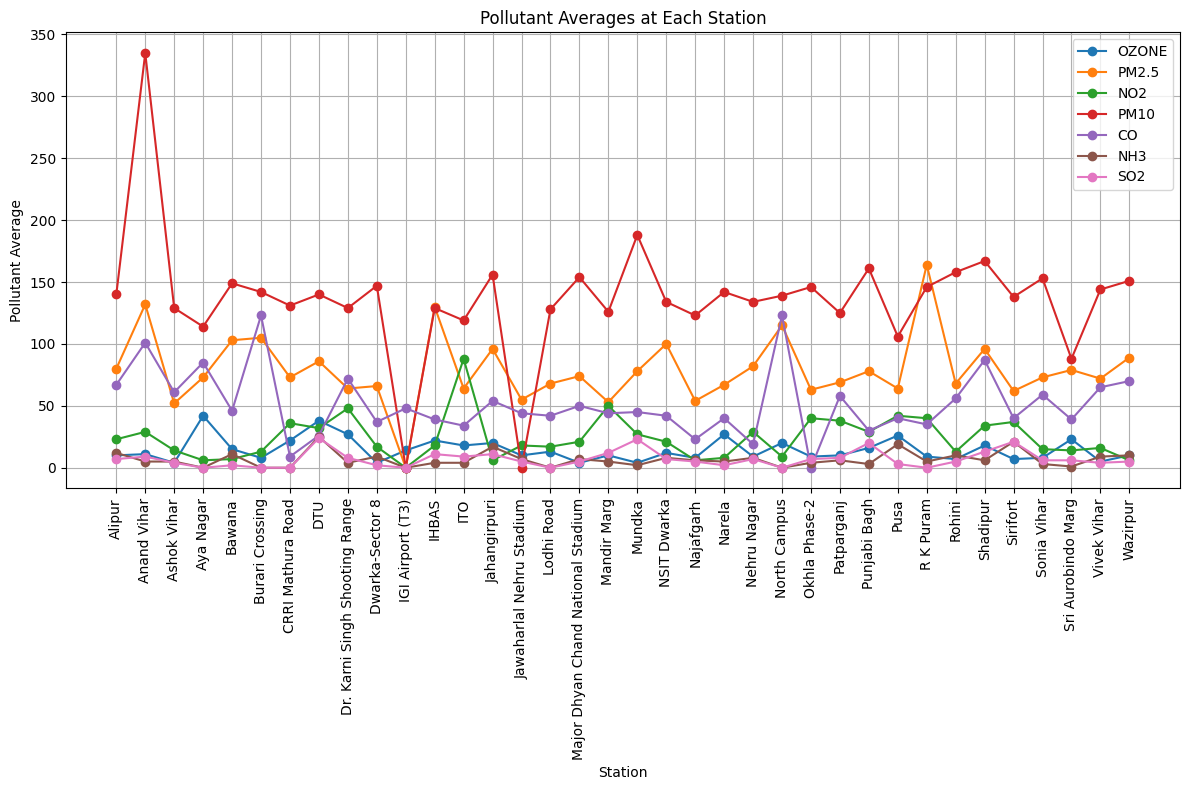

In [15]:
# Creating a list of unique pollutants
pollutants = delhi['pollutant_id'].unique()

# Storing the pollutant data in a dictionary
pollutant_data = {pollutant: delhi[delhi['pollutant_id'] == pollutant] for pollutant in pollutants}

# Since station name can be jumbled, sorting them to properly plot the graph
stations = sorted(delhi['station'].unique())

# Declaring the figure size
plt.figure(figsize=(12, 8))
ax = plt.gca() # GCA: 'Get Current Access'

for pollutant in pollutants:
    station_avg = [pollutant_data[pollutant][pollutant_data[pollutant]['station'] == station]['pollutant_avg'].values[0] if station in pollutant_data[pollutant]['station'].values else 0 for station in stations]
    ax.plot(stations, station_avg, marker='o', label=pollutant, linestyle='-')

# Set x-axis labels and title
plt.xlabel('Station')
plt.ylabel('Pollutant Average')
plt.title('Pollutant Averages at Each Station')

# Adding a legend
plt.legend()

# Rotate x-axis labels for better visibility of station names
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

#### Creating a heatmap to show the relationship between each type of pollutant.

pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
station,,,,,,,
Alipur,67.0,12.0,23.0,10.0,140.0,80.0,7.0
Anand Vihar,101.0,5.0,29.0,11.0,335.0,132.0,9.0
Ashok Vihar,61.0,5.0,14.0,4.0,129.0,52.0,4.0
Aya Nagar,85.0,NaN,6.0,42.0,114.0,73.0,NaN
Bawana,46.0,11.0,7.0,15.0,149.0,103.0,2.0


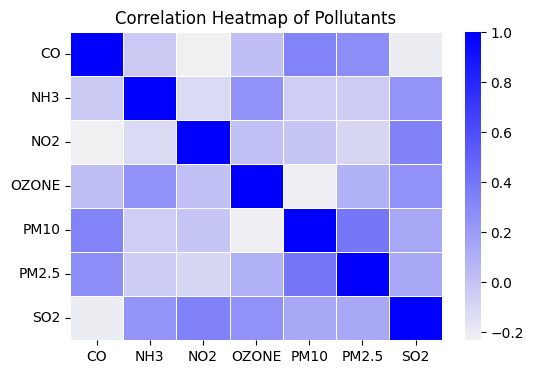

In [16]:
combined_data = pd.concat([ozone, pm_25, no_2, pm_10, co, nh_10, so_2])

pivot_data = combined_data.pivot_table(index='station', columns='pollutant_id', values='pollutant_avg')

display(pivot_data.head())

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Creating a heatmap
plt.figure(figsize=(6, 4))
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=.5)
plt.title('Correlation Heatmap of Pollutants')
plt.xlabel('')
plt.ylabel('')
plt.show()